В качестве набора данных мы будем использовать набор данных по ирисам. В этом DataSet рассмотрим длину и ширину чашелистиков и лепестков.

Датасет состоит из следующих значений: 
1) sepal length (cm) - длина чашелистника 
2) sepal width (cm) - ширина чашелистника 
3) petal length (cm) - длина лепестка 
4) petal width (cm) - ширина лепестка 
5) target - целевой признак

ИМПОРТ БИБЛИОТЕК

Импортируем библиотеки с помощью команды import. Загрузим файлы датасета в помощью библиотеки Pandas.

In [1]:
#Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
#Преобразование формата в dataFrame - выгрузка датасета про вино
iris = load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [41]:
# Датасет возвращается в виде словаря со следующими ключами
for x in iris:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Размерность данных
iris['data'].shape

(150, 4)

In [9]:
# Размерность целевого признака
iris['target'].shape

(150,)

In [10]:
# Преобразование в Pandas DataFrame
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
# Количество строк в DataSet
total_count = data1.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [13]:
# Список колонок
data1.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [14]:
# Список типов данных всех переменных в DataSet
data1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [15]:
# Проверка на пустые значения
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [16]:
# Основные статистические характеристки набора данных
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
# Определим уникальные значения для целевого признака
data1['target'].unique()

array([0., 1., 2.])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

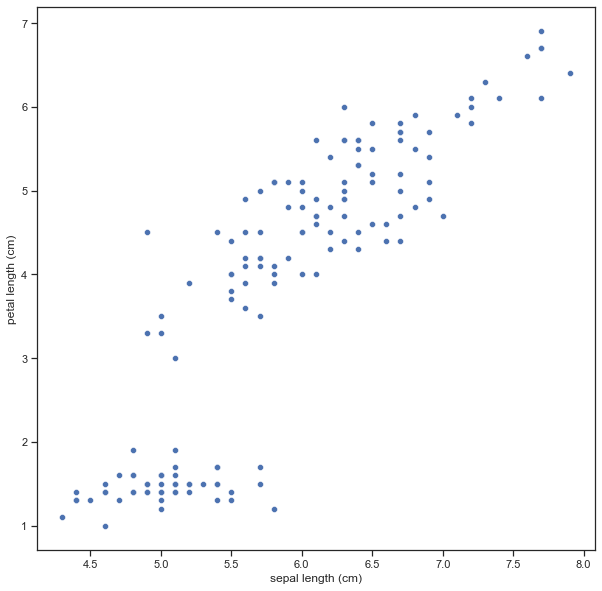

In [24]:
# Визуализация
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data1)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

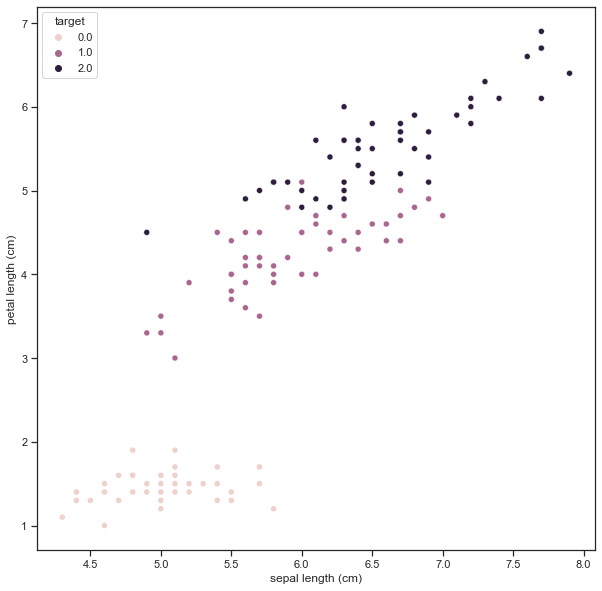

In [25]:
# Визуализация с группировкой по целевому признаку
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data1, hue='target')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

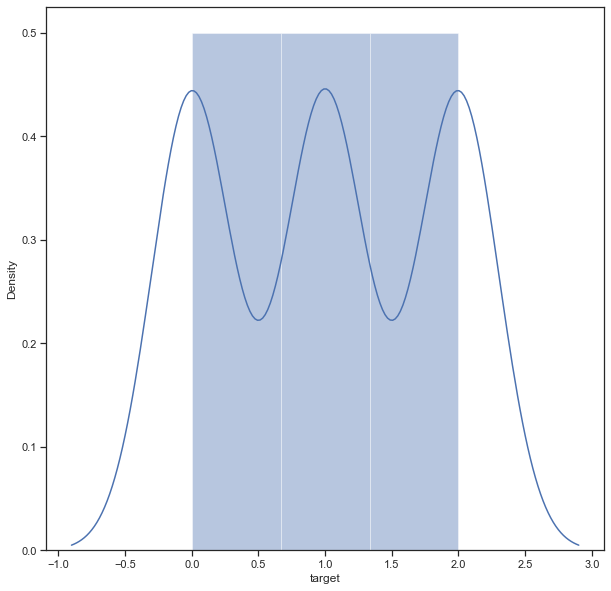

In [26]:
# Гистограмма позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data1['target'])

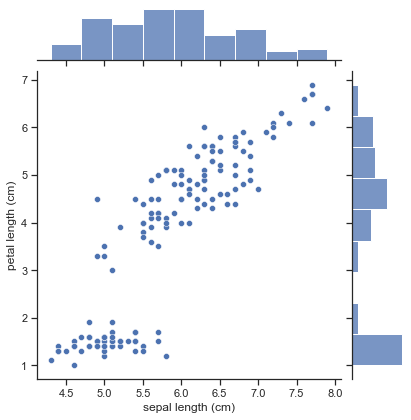

In [27]:
# Комбинация гистограмм и диаграмм рассеивания.
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data1)

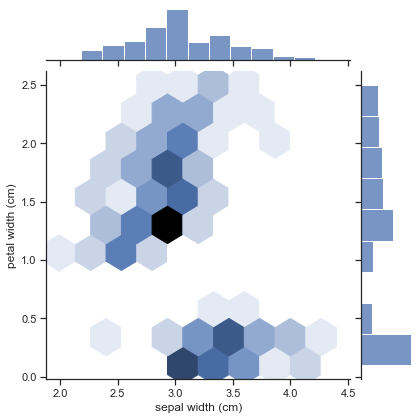

In [28]:
sns.jointplot(x='sepal width (cm)', y='petal width (cm)', data=data1, kind="hex")

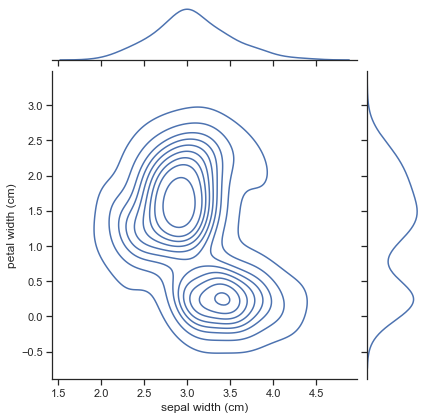

In [29]:
sns.jointplot(x='sepal width (cm)', y='petal width (cm)', data=data1, kind="kde")

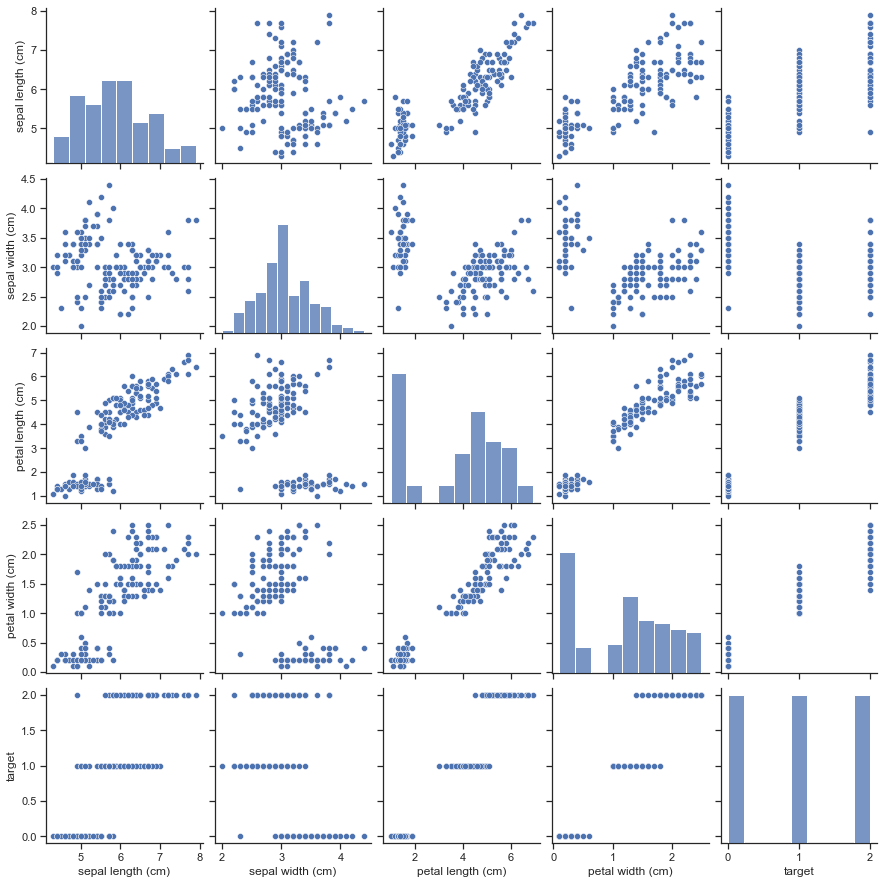

In [30]:
# Комбинация гистограмм и диаграмм рассеивания для всего набора данных.
sns.pairplot(data1)

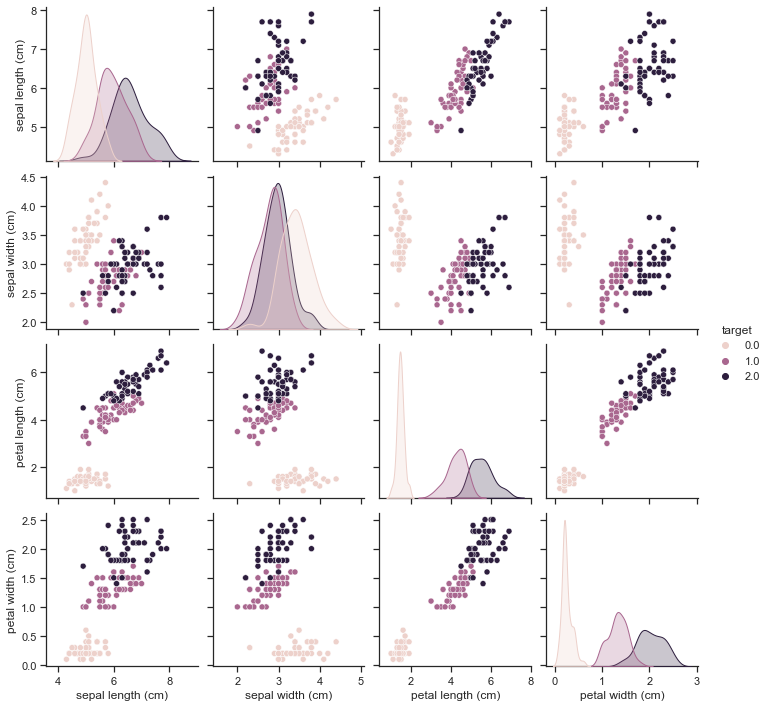

In [31]:
# С помощью параметра "hue" возможна группировка по значениям какого-либо признака.
sns.pairplot(data1, hue="target")

<AxesSubplot:xlabel='sepal width (cm)'>

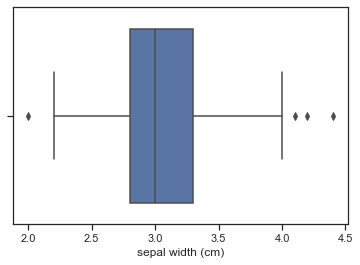

In [32]:
# Отображает одномерное распределение вероятности - Ящик с усами
sns.boxplot(x=data1['sepal width (cm)'])

<AxesSubplot:ylabel='petal width (cm)'>

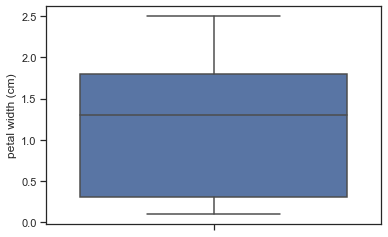

In [33]:
sns.boxplot(y=data1['petal width (cm)'])

<AxesSubplot:>

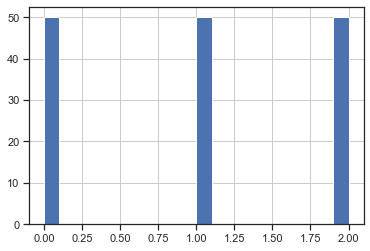

In [34]:
# Гистограмма по крепости алкоголя
data1['target'].hist(bins=20)

<AxesSubplot:xlabel='sepal length (cm)'>

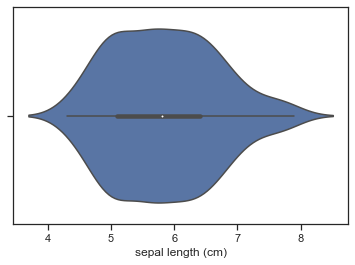

In [35]:
# по краям отображаются распределения плотности
sns.violinplot(x=data1['sepal length (cm)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

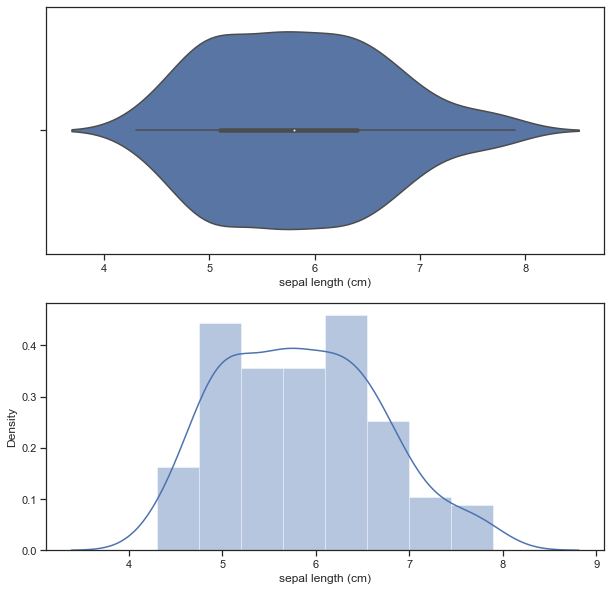

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data1['sepal length (cm)'])
sns.distplot(data1['sepal length (cm)'], ax=ax[1])

In [37]:
# Информация о коррелляции признаков
data1.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [38]:
# Информация о коррелляции признаков разными методами
data1.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.076997,0.718516,0.655309,0.670444
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal length (cm),0.718516,-0.185994,1.000000,0.806891,0.822911
petal width (cm),0.655309,-0.157126,0.806891,1.000000,0.839687
target,0.670444,-0.337614,0.822911,0.839687,1.000000


In [39]:
data1.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
target,0.798078,-0.440290,0.935431,0.938179,1.000000


<AxesSubplot:>

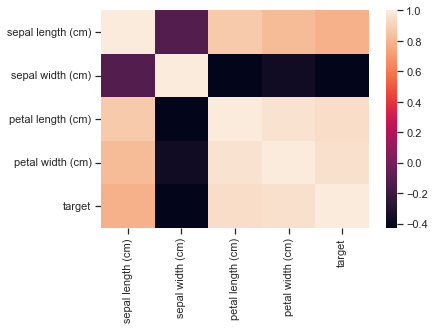

In [40]:
#Для визуализации корреляционной матрицы будем использовать "тепловую карту", 
#которая показывает степень корреляции различными цветами.
sns.heatmap(data1.corr())

<AxesSubplot:>

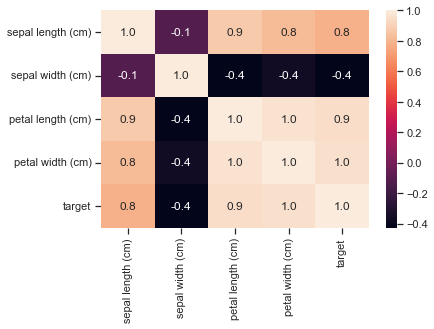

In [41]:
# Вывод значений в ячейках
sns.heatmap(data1.corr(), annot=True, fmt='.1f')

C:\Users\Asus\AppData\Local\Temp/ipykernel_82284/174623946.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data1.corr(), dtype=np.bool)


<AxesSubplot:>

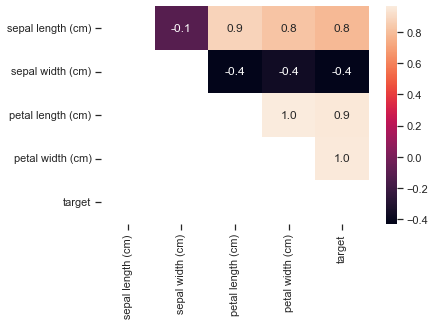

In [42]:
# Треугольный вариант матрицы
mask = np.zeros_like(data1.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data1.corr(), mask=mask, annot=True, fmt='.1f')

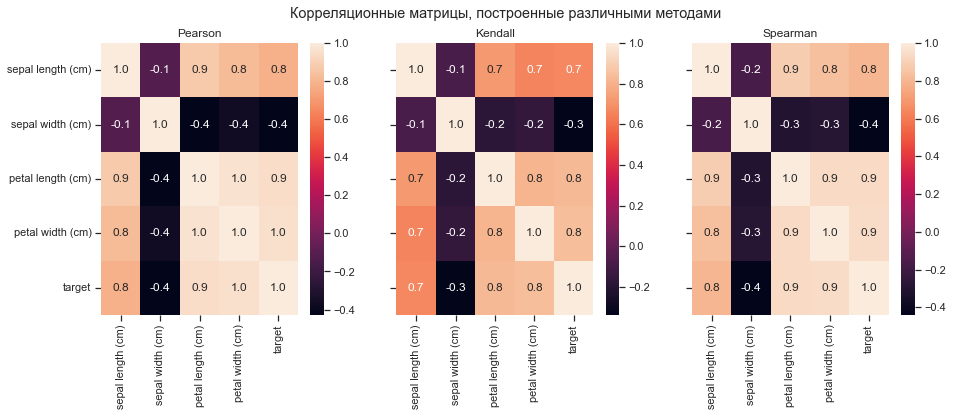

In [43]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')